## 多分类问题中的混淆矩阵

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=666)

In [10]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9408901251738526

In [11]:
y_predict = log_reg.predict(X_test)

In [12]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [13]:
precision_score(y_test, y_predict, average="micro")

np.float64(0.9408901251738526)

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[148,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0, 125,   2,   0,   0,   0,   0,   3,   2,  11],
       [  0,   1, 134,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   1, 138,   0,   5,   0,   1,   4,   0],
       [  2,   4,   0,   0, 138,   0,   1,   3,   0,   2],
       [  1,   2,   1,   0,   0, 146,   1,   0,   0,   1],
       [  0,   2,   0,   0,   0,   1, 132,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 135,   0,   1],
       [  0,   8,   2,   1,   3,   3,   0,   1, 120,   2],
       [  0,   1,   0,   6,   0,   1,   0,   1,   1, 137]])

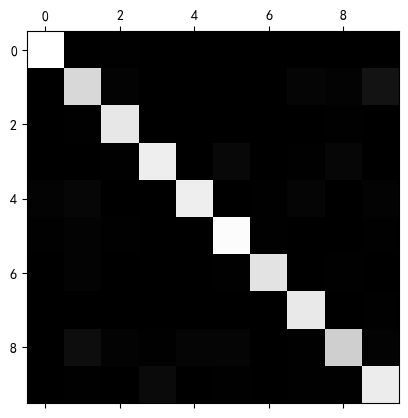

In [15]:
cfm = confusion_matrix(y_test, y_predict)
# 第一个参数放个矩阵进去，
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

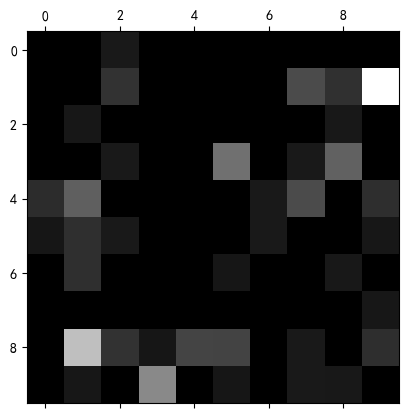

In [16]:
# 每行求和 ，得到一个向量
row_sums = np.sum(cfm, axis=1)
#  每一个元素都除以 该行的总和，得到比率
err_matrix = cfm / row_sums
# 对角线都填充为0 
np.fill_diagonal(err_matrix, 0)
plt.matshow(err_matrix, cmap=plt.cm.gray)
plt.show()
# 下图亮的部分 就是有问题的部分，越亮的地方 ，我们要重点检查。  分类1 预测成了9，  分类8预测成了1。